In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [7]:
# Read the npy file 
FD_Curves = np.load("SOO_results\DP1000_room_Swift_NDBR50_curve2_test\initial\common\FD_Curves.npy", allow_pickle=True).tolist()

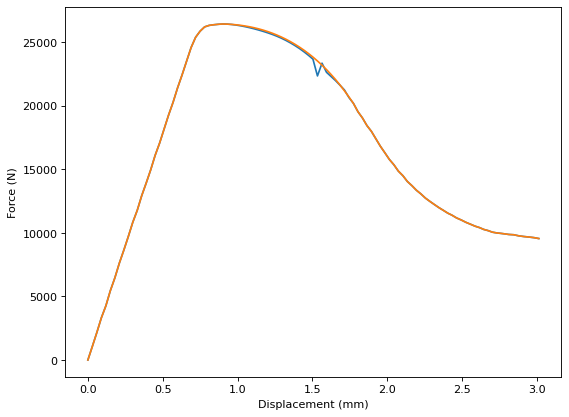

In [29]:
force = list(FD_Curves.values())[3]['force']
displacement = list(FD_Curves.values())[3]['displacement']
# plot
figure(figsize=(8, 6), dpi=80)
plt.plot(displacement, force, label='FD curve')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
#print(list(FD_Curves.values())[5]['force'])

# Apply the Savitzky-Golay Filter to smoothen the force-displacement curve on displacement range [1.2, 1.6]
# Apply the filter 10 times to get a smoother curve
import copy
from scipy.signal import savgol_filter
start = 30
end = 60
smooth_force = copy.deepcopy(force)
for i in range(20000):
    smooth_force = savgol_filter(smooth_force[start:end], 
                                window_length=5, 
                                polyorder=3,
                                #deriv=0,
                                #delta=1
                                )
    smooth_force = np.concatenate((force[0:start], smooth_force, force[end:]))
plt.plot(displacement, smooth_force, label='Smoothed FD curve')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [4]:
from stage0_configs import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |     100     |
|  Initial sims spacing  |    10000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |  SwiftVoce  |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



In [20]:
def smoothing_force(force):
    start = 30
    end = 70
    smooth_force = copy.deepcopy(force)
    for i in range(10000):
        smooth_force = savgol_filter(smooth_force[start:end], 
                                    window_length=5, 
                                    polyorder=3,
                                    #deriv=0,
                                    #delta=1
                                    )
        smooth_force = np.concatenate((force[0:start], smooth_force, force[end:]))
    return smooth_force

def find_abrupt_changes_index(force, displacement):
    # Calculating the slope of the force-displacement curve
    slope = np.abs(np.diff(force)/np.diff(displacement))
    # find the index where the slope is at least 3 times larger than the previous slope
    abrupt_changes_index = None
    for i in range(1, len(slope)):
        if slope[i] > 4*slope[i-1]:
            abrupt_changes_index = i
            break
    return abrupt_changes_index

None
25
None
None
None
17
40
12
None
None


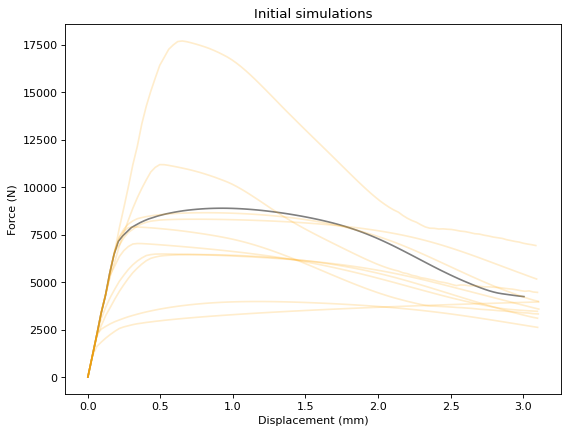

In [21]:
resultPath = info['resultPath']
targetPath = info['targetPath']
# plot initial sims
FD_Curves = np.load(f"{resultPath}/initial/common/FD_Curves.npy", allow_pickle=True).tolist()

figure(figsize=(8, 6), dpi=80)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.title('Initial simulations')
# Plot target curve from csv file
targetCurve = pd.read_csv(f"{targetPath}/FD_curve.csv")
plt.plot(targetCurve['displacement/mm'], targetCurve['force/N'], label='Target curve', color="black", alpha=0.5)


#for i in range(0, len(FD_Curves)):
for i in range(0, 10):
    force = list(FD_Curves.values())[i]['force']
    smooth_force = smoothing_force(force)
    displacement = list(FD_Curves.values())[i]['displacement']
    print(find_abrupt_changes_index(force, displacement))
    plt.plot(displacement, smooth_force, label='FD curve', color="orange", alpha=0.2)